# ECS766P Data Mining Coursework 2

## Table of Contents

- Section 1 - Kulczynski Function
- Section 2 - Imbalance Ratio Function
- Section 3 - Itemset Size
- Section 4 - Outlier Detection Using the Maximum Likelihood Method
  - 4.1 Rainfall Data
  - 4.2 Mean ($\mu$)
  - 4.3 Standard Deviation ($\sigma$)
  - 4.4 Identify Outliers ($\mu \pm 3\sigma$)
- Section 5 - Outlier Detection Using the SVM Classifier Method
  - 5.1 Load the Stock Prices Dataset
  - 5.2 SVM Classifier
  - 5.3 3-D Scatterplot and Histogram
  - 5.4 Outlier Detection Approaches Comparison
- Section 6 - Outlier Detection Using PCA and K-Nearest Neigbours
  - 6.1 Load the House Prices Dataset
  - 6.2 Principal Component Analysis (PCA)
  - 6.3 K-Nearest Neighbors (KNN)
  - 6.4 3-D Scatterplot
- Section 7 - HTML Analysis and Data Cleaning
  - 7.1 Load the Individuals' Income and Shopping Habits Table
  - 7.2 Tags Report
  - 7.3 Scrape and Convert Table
- Section 8 - Document Clustering using K-Means
  - 8.1 Load the Wikipedia Articles
  - 8.2 Data Preparation and Cluster Selection
  - 8.3 Document Clustering using K-Means

## Section 1: Kulczynski Function

This function calculates the Kulczynski measure ($K$) for a given data frame of frequent itemsets and an association rule. It measures how strongly two itemsets (antecedents $A$ and consequents $B$) are linked by averaging the confidence of the rule in both directions:


$$ K_{A,B} = \frac{V_{A \rightarrow B} + V_{B \rightarrow A}}{2} $$

Where:

- $V_{A \rightarrow B} $ : Confidence of $ A \rightarrow B $ (the likelihood of $B$ occurring given $A$)
- $V_{B \rightarrow A} $ : Confidence of $ B \rightarrow A $ (the likelihood of $A$ occurring given $B$)


In [1]:
#function to calculate kulczynski measure
def kulczynski_measure(df, association):

    #extract the two itemsets from the association rule
    antecedents, consequents = association 

    #get the support for a, c and a&c (proportion of transactions containing that value)
    a = df.loc[df['itemsets'] == antecedents, 'support'].values[0]
    c = df.loc[df['itemsets'] == consequents, 'support'].values[0]
    a_U_c = df.loc[df['itemsets'] == (antecedents | consequents), 'support'].values[0]

    #calculate the confidence (likelihood of c occuring given a and vice versa)
    a_to_c = a_U_c/a
    c_to_a = a_U_c/c

    #calculate the kulczynski measure (average of both confidences)
    kulczynski = 0.5 * (a_to_c + c_to_a)

    #return kulczynski measure
    return float(kulczynski)

## Section 2: Imbalance Ratio Function

This function calculates the Imbalance Ratio ($I$) for a given data frame of frequent itemsets and an association rule. It measures the difference between the support of $A$ (antecedents) and $B$ (consequents), normalised by the total number of transactions that include $A$, $B$ or both (their union):



$$ I_{A,B} = \frac{|N_A - N_B|}{N_A + N_B - N_{A \cup B}} $$


Where:

- $N_A$: Support of $A$ (proportion of transactions containing $A$)
- $N_B$: Support of $B$ (proportion of transactions containing $B$)
- $N_{A \cup B}$: Support of $(A \cup B)$ (proportion of transactions containing both $A$ and $B$)


In [2]:
#function to calculate kulczynski measure
def imbalance_ratio(df, association):

    #extract the two itemsets from the association rule
    antecedents, consequents = association 

    #get the support for a, c and a&c (proportion of transactions containing that value)
    a = df.loc[df['itemsets'] == antecedents, 'support'].values[0]
    c = df.loc[df['itemsets'] == consequents, 'support'].values[0]
    a_U_c = df.loc[df['itemsets'] == (antecedents | consequents), 'support'].values[0]

    #calculate imbalance ratio (use abs to calculate absolute difference)
    imbalance = abs(a-c)/(a+c - a_U_c)

    #return imbalance ratio measure
    return float(imbalance)

## Section 3: Itemset Size

In frequent itemset mining, given a set of items $I = \{1, 2, \dots, N\}$, the size of all possible valid itemsets can be determined by considering the total number of subsets of $(I)$. According to the **Apriori alogrithm**, this is represented as:

$2^N$

Where:
- $N$ is the number of unique items in $I$
- Including all empty and non-empty subsets

However, the **Apriori Property** states that all non-empty subsets of a frequent itemset must also be frequent meaning only non-empty subsets are considered 'valid', as the empty set has no significance. As a result, the expression that represents the size of all possible valid itemsets is:

$2^N -1$

Where:

- $2^N$ represents the total number of subsets, including the empty set.
- $-1$  removes the empty set, leaving only the non-empty valid itemsets.

For example, if $I = \{1, 2, 3\}$:

- The subsets = $[$ $\{\}, \{1\}, \{2\}, \{3\}, \{1, 2\}, \{1, 3\}, \{2, 3\}, \{1, 2, 3\}$ $]$
- Total subsets = $2^N = 2^3$
- Size of all possible valid itemsets = $2^3 - 1 = 7$


## Section 4: Outlier Detection Using the Maximum Likelihood Method

### 4.1 Rainfall Data

The monthly rainfall in Paris in 2020 had the following amount of precipitation (measured in mm and the values are from January 2020 to December 2020):

$\{20.95, 22.41, 25.21, 25.78, 28.43, 22.67, 24.55, 5.49, 23.11, 26.42, 23.90, 23.53\}$

With the assumption that the data is based on a normal distribution, the outliers in the dataset can be identified using the maximum likelihood method. This method detects outliers by calculating the mean and standard deviation, then identifies the values that fall outside the range of μ ± 3σ as these values have a very low probability of occurring under the normal distribution. 

### 4.2 Mean ($\mu$)

First the mean will be calculated as a reference point to detect values that deviate significantly:

$\mu = \frac{\sum x_i}{N}$

Where:

- $x_i$ is the sum of the data

  $(20.95+22.41+25.21+25.78+28.43+22.67+24.55+5.49+23.11+26.42+23.90+23.53)$
- $N$ is the number of data points  $(12)$


$\mu = \frac{272.25}{12} \approx 22.70$

### 4.3 Standard Deviation ($\sigma$)

The standard deviation will be calculated to show how spread out the data is, helping identify values that deviate significantly:


$\sigma = \sqrt{\frac{(\sum x_i - \mu)^2}{N}}$

$(\sum x_i - \mu)^2$ for each value:

| *x<sub>i</sub>*     |      *x<sub>i</sub> - μ*              | *(x<sub>i</sub> - μ)<sup>2</sup>* |
|---------------------|------------------------------------|-----------------------------------|
| 20.95          | 20.95 − 22.70 = −1.75           | 3.06                            |
| 22.41          | 22.41 − 22.70 = −0.29           | 0.08                            |
| 25.21          | 25.21 − 22.70 = 2.51            | 6.30                            |
| 25.78          | 25.78 − 22.70 = 3.08            | 9.49                            |
| 28.43          | 28.43 − 22.70 = 5.73            | 32.83                           |
| 22.67          | 22.67 − 22.70 = −0.03           | 0.00                            |
| 24.55          | 24.55 − 22.70 = 1.85            | 3.42                            |
| 5.49           | 5.49 − 22.70 = −17.21           | 296.18                          |
| 23.11          | 23.11 − 22.70 = 0.41            | 0.17                            |
| 26.42          | 26.42 − 22.70 = 3.72            | 13.83                           |
| 23.90          | 23.90 − 22.70 = 1.20            | 1.44                            |
| 23.53          | 23.53 − 22.70 = 0.83            | 0.69                            |
|Total          |             | 367.49                            |


$\sigma = \sqrt{\frac{367.49}{12}} \approx 5.53$

### 4.4 Identify Outliers ($\mu \pm 3\sigma$)

The maximum likelihood method uses the threshold $\mu \pm 3\sigma$ as it captures most of the data (99.7%) in a normal distribution, anything outside this range is considered an outlier.

$\mu \pm 3\sigma$

- $3\sigma$:
     $3 \times 5.53 = 16.59$

- $\mu - 3\sigma$:
     $22.70 - 16.59 = 6.11$

- $\mu + 3\sigma$:
     $22.70 + 16.59 = 39.29$

$\{20.95, 22.41, 25.21, 25.78, 28.43, 22.67, 24.55, 5.49, 23.11, 26.42, 23.90, 23.53\}$

All data falls within the calculated upper and lower bounds, except for 5.49mm which deviates significantly by 17.21mm from the mean. The ratio $\frac{17.21}{5.53} = 3.11$ exceeds the threshold of 3 and shows the probability of the normal distribution generating 5.49mm is less than 0.15%. 

Therefore, the identified outlier in the Paris 2020 monthly rainfall dataset, using the maximum likelihood method is:

                                5.49 mm, recorded in August 2020
  


## Section 5: Outlier Detection Using the SVM Classifier Method

### 5.1 Load the Stock Prices Dataset

In [3]:
import pandas as pd

#load and display dataset with date column as index
stocks = pd.read_csv('stocks.csv', index_col='Date')
print('Stocks Dataset:')
display(stocks)

Stocks Dataset:


,MSFT,F,BAC
Date,,,
1/3/2007,29.860001,7.51,53.330002
1/4/2007,29.809999,7.70,53.669998
1/5/2007,29.639999,7.62,53.240002
1/8/2007,29.930000,7.73,53.450001
1/9/2007,29.959999,7.79,53.500000
...,...,...,...
12/23/2016,63.240002,12.46,22.600000
12/27/2016,63.279999,12.39,22.610001
12/28/2016,62.990002,12.25,22.330000


### 5.2 SVM Classifier

This section estimates the outliers in the dataset using the one-class SVM classifier approach.

As input to the classifier, the percentage of changes in the daily closing price of each stock is used to focus on relative price movements:

\begin{equation}
\Delta(t) = 100 \times \frac{x_t - x_{t-1}}{x_{t-1}} 
\end{equation}
Where:
- $x_t$ denotes the price of a stock on day $t$ 
- $x_{t-1}$ denotes the price on its previous day, $t-1$.

In [4]:
import numpy as np

#compute percentage changes in the daily closing price of each stock (delta)
N,d = stocks.shape

delta = pd.DataFrame(100*np.divide(stocks.iloc[1:,:].values-stocks.iloc[:N-1,:].values, 
                                   stocks.iloc[:N-1,:].values),columns=stocks.columns, 
                                    index=stocks.iloc[1:].index)
display(delta.head())


#summarise the updated dataset shape
print("Shape of dataset:", delta.shape)

,MSFT,F,BAC
Date,,,
1/4/2007,-0.167455,2.529960,0.637532
1/5/2007,-0.570278,-1.038961,-0.801185
1/8/2007,0.978411,1.443570,0.394438
1/9/2007,0.100231,0.776197,0.093543
1/10/2007,-1.001332,-0.770218,0.149536


Shape of dataset: (2517, 3)


The dataset shows the percentage changes in daily closing prices for three stocks (MSFT, F and BAC) over time (Date), with 2,517 rows and 3 columns.

The dataset is then separated into X (feature values) and y (index values), X is scaled using StandardScaler to standardise the features.

In [5]:
from sklearn.preprocessing import StandardScaler

#feature and index
X, y = delta.values, delta.index

#standardise X
X_scaled = StandardScaler().fit_transform(X)

print(X_scaled.shape, y.shape)

(2517, 3) (2517,)


The dataset shape shown includes both inliers and outliers, the OneClassSVM() function is used below to describe the 'normal' data detect those outliers in the percentage changes of daily stock prices (-1 for outliers and 1 for inliers).

In [6]:
from sklearn.svm import OneClassSVM

#define and fit one-class SVM model
SVM = OneClassSVM(nu=0.01, gamma='auto')  #nu controls proportion of outliers, expected at 1%
y_hat = SVM.fit_predict(X_scaled)  #predict outlier labels for input data

#print labels, -1 for outliers and 1 for inliers.
print(y_hat)

[1 1 1 ... 1 1 1]


After training the model (SVM), the dataset is filtered to exclude all rows with outliers.

In [7]:
#select rows that are not outliers
mask = y_hat != -1
filtered_data = X_scaled[mask]

#summarise the updated dataset shape
print("Shape of updated dataset:", filtered_data.shape)

Shape of updated dataset: (2392, 3)


The updated stocks dataset has a significantly smaller number of objects from 2,517 to 2,392, considered by the one-class SVM to be inliers (belonging to the normal distribution of the data). 

### 5.3 3-D Scatterplot and Histogram

A 3D scatterplot is plotted of the dataset to show whether each object within the delta dataset is an outlier (-1) or an inlier (1). 

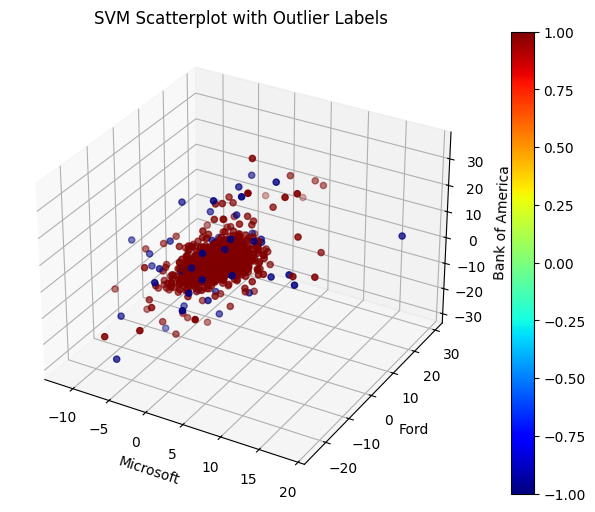

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#display 3D scatterplot (datapoints colours according to whether they're an outlier or not)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(delta.MSFT,delta.F,delta.BAC, c=y_hat, cmap='jet')
ax.set_xlabel('Microsoft')
ax.set_ylabel('Ford')
ax.set_zlabel('Bank of America')
ax.set_title('SVM Scatterplot with Outlier Labels') 
fig.colorbar(p)
plt.show()

The visualisation shows that most of the data points are clustered together and classified as inliers (red), yet some outliers (blue) appear in a smaller number of points, scattered further away.

A histogram and the frequencies of the estimated outlier and inlier labels are produced to show the distribution of the detection results, highlighting the counts of each.

Number of outliers: 125
Number of inliers: 2392


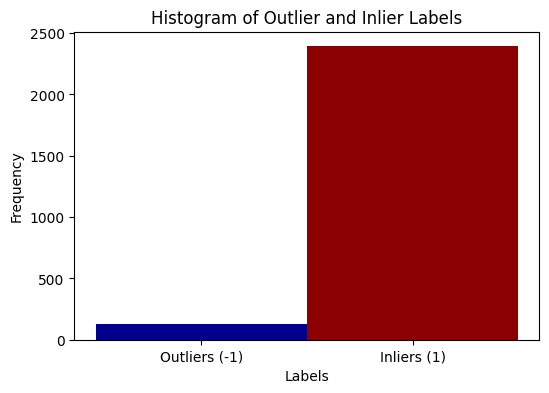

In [9]:
#frequencies of outlier and inlier labels
n_outliers = sum(y_hat == -1)
n_inliers = sum(y_hat == 1)

print("Number of outliers:", n_outliers)
print("Number of inliers:", n_inliers)

#plot histogram
plt.figure(figsize=(6, 4))
plt.hist(y_hat, bins=2)
bars = plt.gca().patches
bars[0].set_facecolor('darkblue')  # Outliers bar (first bar)
bars[1].set_facecolor('darkred')  
plt.xticks([-0.5, 0.5], ['Outliers (-1)', 'Inliers (1)'])  # Customize x-axis labels
plt.title('Histogram of Outlier and Inlier Labels')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.show()

Most of the data is shown to be made up of inliers (2,392), yet some outliers appear (125), suggesting that the majority of the data follows a normal distrubution, with some exceptions.

### 5.4 Outlier Detection Approaches Comparison

- Parametric Method - outlier scores are based on the Mahalanobis distance, the point's deviation from the Gaussian mean. Higher scores indicate outliers and lower scores as inliers on the scatterplot.

- Proximity-Based Method - outlier scores are based on the k-th nearest neighbor distance without assuming any specific data distribution, where larger distances indicate more isolated points (outliers) on the scatter plot. This method assigns numerical scores reflecting proximity patterns. 

- One-Class SVM - this method directly classifies data into two categories (-1 for outliers and 1 for inliers) by learning a boundary around normal data. The output simplifies the scatter plot, as outliers (red) and inliers (blue) are clearly distinguishable in the scatterplot without the use of a score. Overall, this approach classified approximatley 4.97% of the dataset objects as outliers. 

## Section 6: Outlier Detection Using PCA and K-Nearest Neigbours

### 6.1 Load the House Prices Dataset

In [10]:
from pandas import read_csv

#loading the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'

houses = pd.read_csv(url, header=None)

display(houses)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


### 6.2 Principal Component Analysis (PCA)

Dimensionality reduction is performed on the house prices dataset using PCA, reducing the feature space to two principal components. This will pre-process the data ready for K-Nearest Neighbors (KNN) outlier detection analysis.

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

#separate features and target
X = houses.drop(columns=[13])
y = houses[13]
u
#standardise the data
X_scaled = StandardScaler().fit_transform(X)

#PCA with standardisation
X_pca_scaled = PCA(n_components=2).fit_transform(X_scaled)

#convert pca results to dataframe for scatterplot
pca_df_scaled = pd.DataFrame(X_pca_scaled, columns=['PC1','PC2'])

print(pca_df_scaled)

          PC1       PC2
0   -2.098297  0.773113
1   -1.457252  0.591985
2   -2.074598  0.599639
3   -2.611504 -0.006871
4   -2.458185  0.097712
..        ...       ...
501 -0.314968  0.724285
502 -0.110513  0.759308
503 -0.312360  1.155246
504 -0.270519  1.041362
505 -0.125803  0.761978

[506 rows x 2 columns]


### 6.3 K-Nearest Neighbors (KNN)

Outlier detection is performed on the pre-processed dataset using the k-nearest neighbours (k=2) approach, where the outlier score is calculated as the distance to the second nearest neighbor.

In [12]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance

#k-nearest neighbour approach using k=2 neighbours
knn = 2
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(pca_df_scaled.values)
distances, indices = nbrs.kneighbors(pca_df_scaled.values)

#the outlier score is set as the distance between the point and its k-th nearest neighbour
outlier_score = distances[:,knn-1]

### 6.4 3-D Scatterplot

A 3-D Scatterplot of the 2 principal components is produced, where each object is colour-coded according to the computed outlier score. 

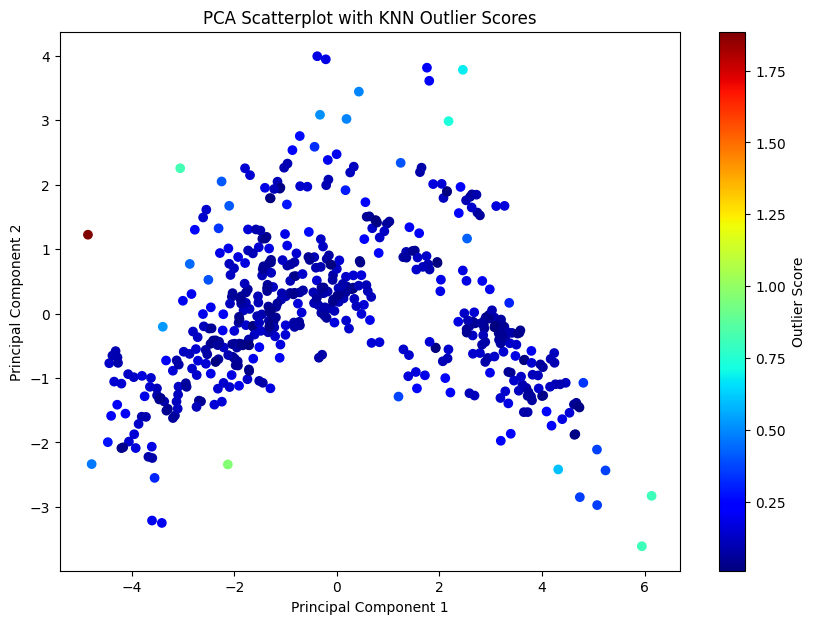

In [13]:
#add the outlier score to the PCA DataFrame
pca_df_scaled['Label'] = outlier_score

#scatterplot of the 2 principal components with outlier score as colour
plt.figure(figsize=(10, 7))
scatter_plot = plt.scatter(pca_df_scaled.PC1, pca_df_scaled.PC2, c=outlier_score, cmap='jet')

plt.title('PCA Scatterplot with KNN Outlier Scores')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter_plot, label='Outlier Score')
plt.show()

The scatter plot shows darker blue points represent inliers with low outlier scores, while lighter-coloured and red points indicate outliers with higher outlier scores which suggest they are more distant from their nearest neighbors.

## Section 7: HTML Analysis and Data Cleaning

### 7.1 Load the Individuals' Income and Shopping Habits Table

In [14]:
from urllib.request import urlopen

url = "http://eecs.qmul.ac.uk/~emmanouilb/income_table.html"
html = urlopen(url)

### 7.2 Tags Report

This html code is inspected manually and this report defines the HTML tags present in the code for the table and their functions.

- `<html>`  = the root tag that encloses all content in the HTML document.

- `<head>`  = metadata about the document, e.g. the title, character encoding and links.

- `<body>`  = all the visible content of the webpage, e.g. the text and table.

- `<h1>`  = a heading tag that represents the largest heading level, e.g. main title of the page. 

- `<table>`  = a table for displaying tabular data.

- `<tr>`  = a row within the table.

- `<th>`  = a header cell within the table. 

- `<td>`  = a standard cell within a table row, contains the actual table data.

- `<p>`  = a paragraph of text, used to add a block of content.

### 7.3 Scrape and Convert Table

The table is scraped and converted into a pandas dataframe (keeping missing values as they are).

In [15]:
from bs4 import BeautifulSoup

#parse the HTML content
soup = BeautifulSoup(html, 'html.parser')

#find the table and extract rows
table = soup.find('table')
rows = table.find_all('tr')

#extract header and data
header = [header.text.strip() for header in rows[0].find_all('th')]
data = [[cell.text.strip() for cell in row.find_all('td')] for row in rows[1:] if row.find_all('td')]

#create DataFrame
df = pd.DataFrame(data, columns=header)
    
#display the DataFrame
print("Scraped and Converted Table:")
display(df)

Scraped and Converted Table:


,Region,Age,Income,Online Shopper
0,India,49,86400,No
1,Brazil,32,57600,Yes
2,USA,35,64800,No
3,Brazil,43,73200,No
4,USA,45,,Yes
5,India,40,69600,Yes
6,Brazil,,62400,No
7,India,53,94800,Yes
8,USA,55,99600,No
9,India,42,80400,Yes


## Section 8: Document Clustering using K-Means

### 8.1 Load the Wikipedia Articles

In [33]:
import wikipedia

articles=['supervised learning', 'unsupervised learning', 'semi-supervised learning', 
          'association rule learning', 'anomaly detection', 'cluster analysis', 
          'dimensionality reduction', 'regression analysis',' statistical classification', 
          'data warehouse', 'online analytical processing']
wiki_lst=[]
title=[]

#load wikipedia articles
for article in articles:
   print("loading content: ",article)
   wiki_lst.append(wikipedia.page(article,auto_suggest=False).content)
   title.append(article)

loading content:  supervised learning
loading content:  unsupervised learning
loading content:  semi-supervised learning
loading content:  association rule learning
loading content:  anomaly detection
loading content:  cluster analysis
loading content:  dimensionality reduction
loading content:  regression analysis
loading content:   statistical classification
loading content:  data warehouse
loading content:  online analytical processing


### 8.2 Data Preparation and Cluster Selection

The `TfidfVectorizer` is used below to first convert the text data into a TF-IDF matrix to prepare the data for clustering, emphasising unique terms while ignoring common stop words (e.g. "the").

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

#vectorize the documents using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(wiki_lst) 

#display shape of tf-idf feature
print(X.shape)

(11, 4039)


This shows X contains 11 documents in each row and 4,039 terms ready for clustering. Before the model is fit, the k-means algorithm requires the number of clusters to be specified, this can be estimated using the elbow method which calculates the sum of squared distances for various values of k (using values of k from 2 to 10).

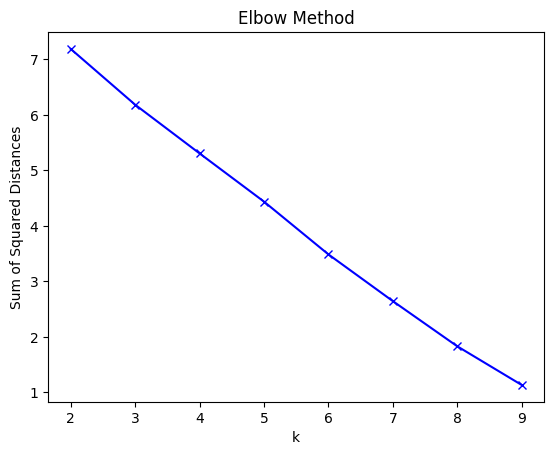

In [43]:
from sklearn.cluster import KMeans

#calculate the sum of squared distances 
Sum_of_squared_distances = []
K = range(2, 10)

for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

#plot elbow method
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

The inertia decreases but there is no clear elbow point, therefore to balance the number of clusters and inertia reduction, k=4 is chosen as the rate of decrease slows down at this point. 

### 8.3 Document Clustering using K-Means

The document clustering using k-means is perfomed below, clustering into 4 groups based on the elbow method.

In [42]:
#fit k-means model with k=4
true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)

#display list of documents and associated clusters
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                           title  cluster
6       dimensionality reduction        0
4              anomaly detection        0
0            supervised learning        1
1          unsupervised learning        1
5               cluster analysis        1
2       semi-supervised learning        1
7            regression analysis        1
8     statistical classification        1
3      association rule learning        2
9                 data warehouse        3
10  online analytical processing        3


The clustering produced meaningful groupings: 

- Cluster 0 groups topics like dimensionality reduction and anomaly detection, focusing on preprocessing and outlier detection techniques.
- Cluster 1 groups core machine learning approaches (supervised, unsupervised, semi-supervised) and techniques (regression and statistical classification).
- Cluster 2 is association rule learning, a method for discovering patterns in datasets.
- Cluster 3 groups topics related to data management and analysis, including data warehousing and online analytical processing.